# Постановка задачи

Задача состоит из следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
1. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
1. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
1. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
1. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
1. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
1. Формирование обучающей и тестовой выборок на основе исходного набора данных.
1. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
1. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
1. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
1. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

# Ход выполнения домашнего задания
## Выбор датасета
В качестве набора данных мы будем использовать набор данных по состоянию ходьбы человека - 
https://www.kaggle.com/vmalyi/run-or-walk. 
Датасет состоит из 88588 наборов значений взятых с акселерометра и гироскопа. 
Данные собирались на устройство iPhone 5c, который был закреплен на запястье человека(левое и правое).
Информация о данных бралась каждые 10 секунд.
Задача определения активности по электронным устройствам является актуальной для легкоатлетов.

### Датасет состоит из одного файла:

row_dataset.csv - выборка со всеми данными.

Позже мы разделим данный файл на обучающую и тестовую выборки.


### Файл содержит следующие колонки:

1. date - дата в формате ГОД-МЕСЯЦ-ДЕНЬ.
1. time - время в формате ЧАСЫ:МИНУТЫ:СЕКУНДЫ:ДОЛИСЕКУНДЫ. Набор данных содержит данные с частотой измерения в 5,4 раза в секунду.
1. username - пользователь, который проводил измерение
1. wrist - запястье.
1. activity - тип активности
1. acceleration_x - значение акселерометра по оси X
1. acceleration_y - значение акселерометра по оси Y
1. acceleration_z - значение акселерометра по оси Z
1. gyro_x - значение гироскопа по оси X
1. gyro_y - значение гироскопа по оси Y
1. gyro_z - значение гироскопа по оси Z



In [1]:
from google.colab import drive, files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [0]:
data = pd.read_csv('drive/My Drive/mmo_datasets/row_dataset.csv', sep=",")

In [5]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [6]:
data.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [7]:
# Список колонок с типами данных
data.dtypes

date               object
time               object
username           object
wrist               int64
activity            int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

date - 0
time - 0
username - 0
wrist - 0
activity - 0
acceleration_x - 0
acceleration_y - 0
acceleration_z - 0
gyro_x - 0
gyro_y - 0
gyro_z - 0


Можно замечить, что пустые значения отсутствуют. Инструментами Pandas пользоваться не будем

In [9]:
# Основные статистические характеристки набора данных
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [10]:
ratio_train = 0.98 # Здесь мы берем очень маленькое значение тестовых данных для быстрого анализа

def separate_data(ratio, data):
    count_train = int(data.shape[0]*ratio)
    #data[:][count_train-5:count_train+5]
    data_train = data[:][:count_train]
    data_test = data[:][count_train+1:]
    return data_train, data_test

data_train, data_test = separate_data(ratio_train, data)

data_test.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
86817,2017-7-9,20:2:14:101912021,viktor,0,1,0.7541,0.0245,-1.0089,-0.8400,2.6332,1.2286
86818,2017-7-9,20:2:14:301832973,viktor,0,1,0.8917,0.2568,-0.7409,-0.6894,0.1461,-4.0394
86819,2017-7-9,20:2:14:501981019,viktor,0,1,-0.6973,-0.7831,-0.1123,2.0450,-1.5263,-1.6423
86820,2017-7-9,20:2:14:702419996,viktor,0,1,0.7428,-0.8717,-0.7311,-0.1606,1.3835,4.1870
86821,2017-7-9,20:2:14:901983022,viktor,0,1,0.3246,1.0058,-0.5405,-0.9666,-0.2725,0.9112


# Визуализация данных

In [0]:
# Диаграмма количества уникальных значений
sns.countplot(data.activity)

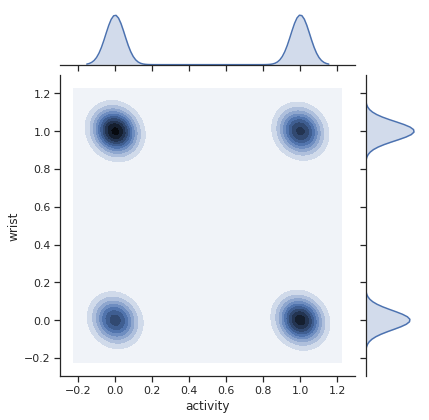

In [13]:
sns.jointplot(x='activity', y='wrist', data=data, kind="kde")

## Диаграмма рассеяния
Интереующие нас значения для данного вида графика - все значения с акселерометра и гироскопа по времени. Именно эти данные по времени нам дадут представление о поведении датчиков на разных типов активности. В качестве целевого признака будем использовать тип_активности (activity)

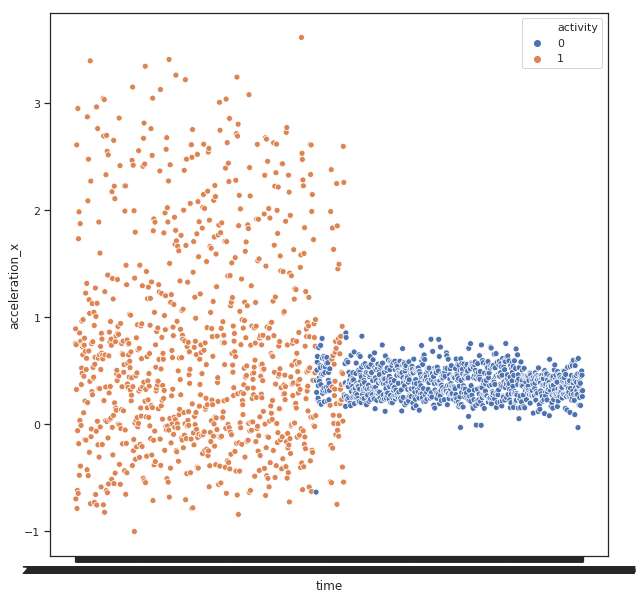

In [14]:
# Показания для acceleration_x
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='time', y='acceleration_x', data=data_test, hue='activity')

Можно заметить, что значения акселеромтра по оси Х при разных видах точки на графике активности (график выше) разбросаны по-разному. Проверим это и для остальных показателей датчиков

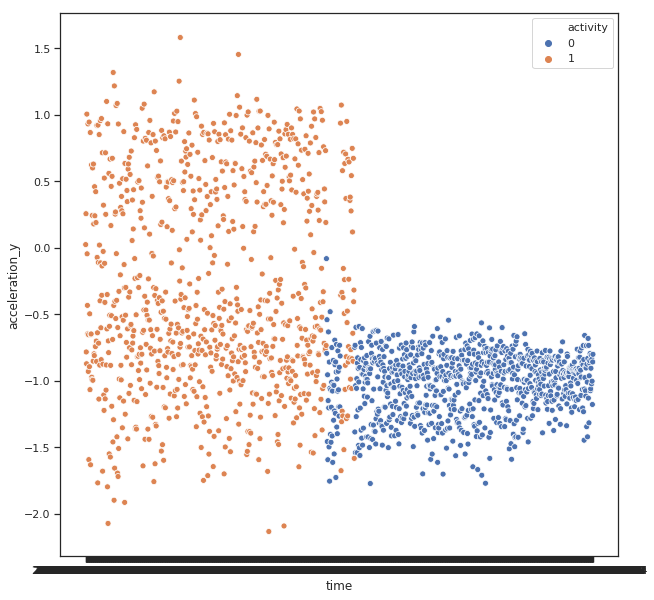

In [15]:
# Показания для acceleration_y
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='time', y='acceleration_y', data=data_test, hue='activity')

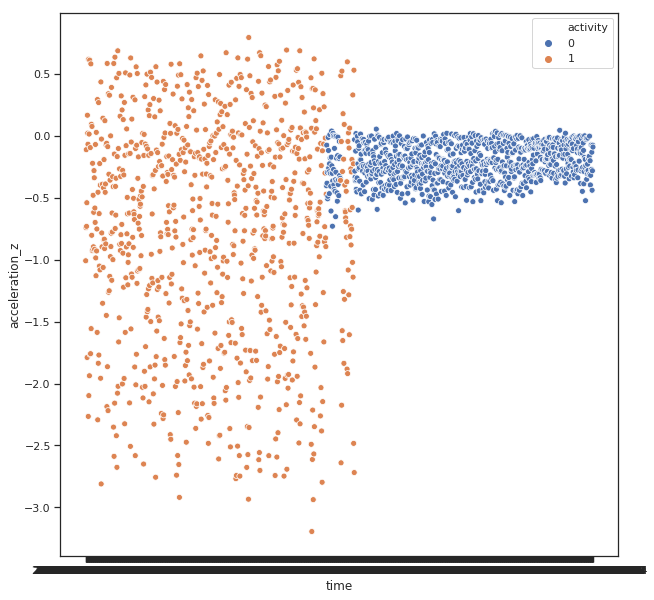

In [16]:
# Показания для acceleration_z
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='time', y='acceleration_z', data=data_test, hue='activity')

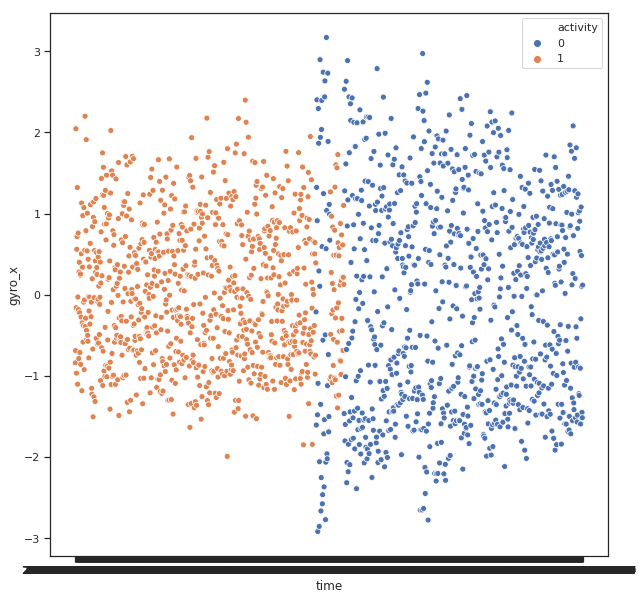

In [17]:
# Показания для gyro_x
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='time', y='gyro_x', data=data_test, hue='activity')

### Вывод
Из приведенных выше графиков визуально наиболее смысловую информацию о типе активности пользователя несут показания с акселерометра устройства. Проверим их плотность распределения.


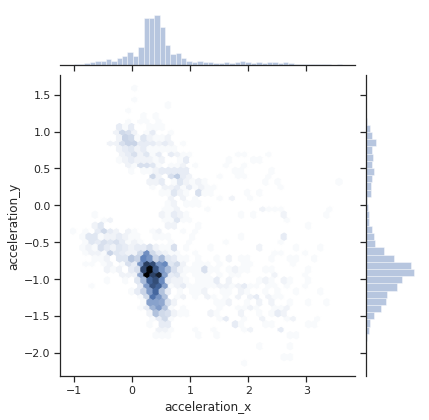

In [18]:
# Смешанная диаграмма рассеяния
sns.jointplot(x='acceleration_x', y='acceleration_y', data=data_test, kind="hex")

Можно заметить, что наиболее выделенное пятно соответствует состоянию, когда ускорение по 2-м осям близко к 0. 
Это состояние присуще сразу 2-м типам активности. В качестве гипотезы примем, что для обучения модели в дальнейшем будем рассматривать именно зависимости по значениям акселерометра.

## Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:

Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "activity"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.

Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [19]:
data.corr()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
wrist,1.000000,-0.113404,-0.609579,0.087091,0.323680,-0.022092,-0.068403,0.008796
activity,-0.113404,1.000000,-0.017747,0.639520,-0.192435,0.040856,0.012055,-0.008106
acceleration_x,-0.609579,-0.017747,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849
acceleration_y,0.087091,0.639520,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994
acceleration_z,0.323680,-0.192435,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621
gyro_x,-0.022092,0.040856,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769
gyro_y,-0.068403,0.012055,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244
gyro_z,0.008796,-0.008106,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000


## Визаулизации коррелиации
Построим матрицу коореляции по трем коэффециентам

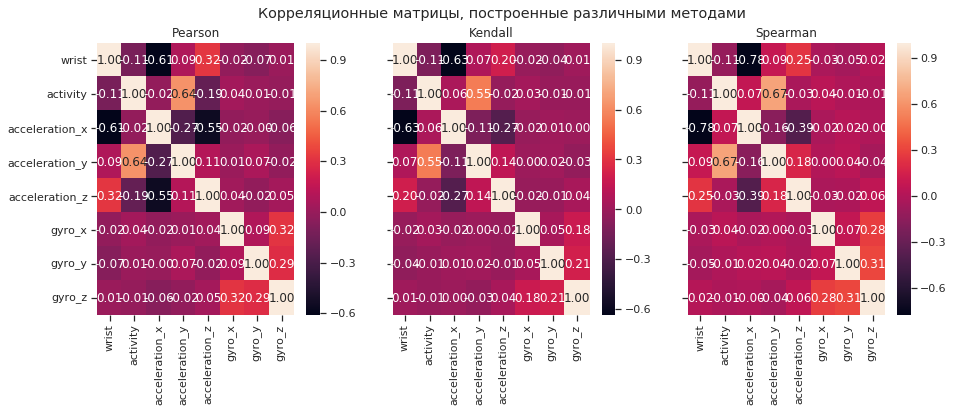

In [20]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

Можно заметить, что наиболее коорелирующием признком (показатель в районе 0,6) является значения акселерометра по оси Y. Коореляция остальных признаков с нашем целевым признаком близка к 0. Соотвественно имеет смысл рассматривать модель по одному признаку acceleration_y

In [21]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [0]:
data_cleared = data

Пользователь, дата и время для дальнейших рассчетов нам более не пригодятся

In [0]:
data_cleared = data_cleared.drop('date', axis=1)
data_cleared = data_cleared.drop('time', axis=1)
data_cleared = data_cleared.drop('username', axis=1)


target = data_cleared['activity']
data_cleared = data_cleared.drop('activity', axis=1)

# Работа с моделью


## Выбор метрик
Для оценки качества моделей будем использовать следующие метрики:
1. **balanced_accuracy_score** - сбалансированная точность в задачах двоичной и мультиклассовой классификации для решения проблемы несбалансированных наборов данных. 

1. **precision_score** - доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

1. **recall_score** - доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов. 

1. **f1_score** - объединяет precision и recall в единую метрику
$$
    F_1 = 2* \frac{precision*recall}{precision+recall}
$$


In [0]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Выбор моделей
1. **SGDClassifier** - стохастический градиентный спуск.

2. **DecisionTreeClassifier** - дерево решений.

3. **RandomForestClassifier** - случайный лес.

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Разделение данных

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    data_cleared, 
    target, 
    test_size=0.2, 
    random_state=1
)

In [31]:
X_train.shape, Y_train.shape

((70870, 7), (70870,))

In [32]:
X_test.shape, Y_test.shape

((17718, 7), (17718,))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров

In [0]:
sgd = SGDClassifier().fit(X_train, Y_train)
predicted_sgd = sgd.predict(X_test)

In [0]:
def print_accuracy_metrics(Y_test, predicted_sgd): 
  print("balanced_accuracy_score {}".format(
      balanced_accuracy_score(Y_test, predicted_sgd)))
  print("precision_score {}".format(
      precision_score(Y_test, predicted_sgd, average='weighted')))
  print("recall_score {}".format(
      recall_score(Y_test, predicted_sgd, average='weighted')))
  print("f1_score {}".format(
      f1_score(Y_test, predicted_sgd, average='weighted')))

In [58]:
print_accuracy_metrics(Y_test, predicted_sgd)

balanced_accuracy_score 0.8631022603267915
precision_score 0.8680546169659322
recall_score 0.8618354216051473
f1_score 0.8614660515679747


In [0]:
dt = DecisionTreeClassifier().fit(X_train, Y_train)
predicted_dt = dt.predict(X_test)

In [61]:
print_accuracy_metrics(Y_test, predicted_dt)

balanced_accuracy_score 0.9841590693674103
precision_score 0.9842000606084306
recall_score 0.9841968619483011
f1_score 0.9841963407661257


In [62]:
rfc = RandomForestClassifier().fit(X_train, Y_train)
predicted_rfc = rfc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [63]:
print_accuracy_metrics(Y_test, predicted_rfc)

balanced_accuracy_score 0.9902083418183306
precision_score 0.9901850286251491
recall_score 0.9901794784964443
f1_score 0.9901797799256783


## Подбор гиперпараметров для выбранных моделей.

In [64]:
rfc_n_range = np.array(range(5,100,5))
rfc_tuned_parameters = [{'n_estimators': rfc_n_range}]
rfc_tuned_parameters 

[{'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
         90, 95])}]

In [65]:
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

gs_rfc = GridSearchCV(RandomForestClassifier(), rfc_tuned_parameters, cv=5,
                      scoring='accuracy')
gs_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [66]:
gs_rfc.best_params_

{'n_estimators': 80}

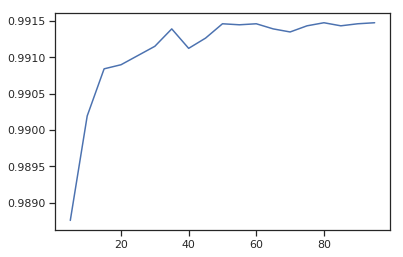

In [67]:
plt.plot(rfc_n_range, gs_rfc.cv_results_['mean_test_score'])

## Сравнение моделей после подбора гиперпараметров

In [0]:
rfc_optimized = RandomForestClassifier(n_estimators=gs_rfc.best_params_['n_estimators']).fit(X_train, Y_train)
predicted_rfc_opt = rfc_optimized.predict(X_test)
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(Y_test, predicted_rfc_opt)

0.9909696353990293

In [72]:
balanced_accuracy_score(Y_test, predicted_rfc_opt)

0.9909561688463788

In [73]:
(precision_score(Y_test, predicted_rfc_opt, average='weighted'), 
 recall_score(Y_test, predicted_rfc_opt, average='weighted'))

(0.9909698646685459, 0.9909696353990293)

In [74]:
f1_score(Y_test, predicted_rfc_opt, average='weighted')

0.9909695479108686

# Выводы
Подбор гиперпараметров для выбранных моделей машинного обучения позволил увеличить точность решения задачи классификации на обучаемых моделях. Наибольший прирост в точности получила модель стохастического градиентного спуска. Однако наиболее точно с задачей классификации на данном датасете справляется дерево решений, как до подбора гиперпараметров, так и после.

# Список литературы


1. Walk Dataset: https://www.kaggle.com/vmalyi/run-or-walk
2. Model evaluation: quantifying the quality of predictions: https://scikit-learn.org/stable/modules/model_evaluation.html
3. Model selection: choosing estimators and their parameters: https://scikit-learn.org/
stable/tutorial/statistical_inference/model_selection.html
4. SGDClassifier: https://scikit-learn.org/stable/modules/generated/
sklearn.linear_model.SGDClassifier.html
5. DecisionTreeClassifier: https://scikit-learn.org/stable/modules/generated/
sklearn.tree.DecisionTreeClassifier.html
6. RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/
sklearn.ensemble.RandomForestClassifier.html